<a href="https://colab.research.google.com/github/TravisJRCain/DS-Unit-2-Applied-Modeling/blob/master/module4-model-interpretation/Travis_Cain_LS_DS14_234_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [0]:
# Only going to use regression for this data set
# R^2 and baseline at the beginning

In [0]:
%%capture
import sys

!pip install category_encoders==2.*
!pip install eli5
!pip install pdpbox
!pip install shap

In [50]:
### PyBaseball ###
pip install pybaseball

In [0]:
from pybaseball import statcast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
from pybaseball import batting_stats
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [52]:
df = batting_stats(2012, 2019, league='all')
df.head()

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,...,CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
140,2018.0,Mookie Betts,Red Sox,25.0,136.0,520.0,614.0,180.0,96.0,47.0,5.0,32.0,129.0,80.0,81.0,8.0,91.0,8.0,5.0,0.0,5.0,30.0,6.0,0.346,147.0,195.0,92.0,18.0,2582.0,1095.0,1487.0,14.0,0.0,0.0,0.132,0.148,0.89,0.438,0.640,1.078,...,NaN,-6.2,9.0,4.9,2.1,NaN,NaN,5.3,0.6,NaN,10.2,NaN,0.4,19.6,4.6,4.0,NaN,NaN,20.3,10.1,NaN,3.62,NaN,0.23,1.96,3.87,6.68,NaN,NaN,4.98,1.93,NaN,0.185,0.535,0.356,0.658,0.926,0.855,0.490,23.3
233,2013.0,Mike Trout,Angels,21.0,157.0,589.0,716.0,190.0,115.0,39.0,9.0,27.0,109.0,97.0,110.0,10.0,136.0,9.0,8.0,0.0,8.0,33.0,7.0,0.323,191.0,164.0,106.0,6.0,3015.0,1295.0,1720.0,31.0,0.0,0.0,0.154,0.190,0.81,0.432,0.557,0.988,...,-13.3,-5.6,9.7,5.4,2.8,0.8,NaN,6.2,1.1,NaN,8.8,-0.2,2.0,19.9,1.6,1.8,-0.2,NaN,27.2,4.9,NaN,3.55,-17.26,0.78,1.65,0.98,3.57,-1.48,NaN,4.67,1.06,NaN,0.236,0.530,0.375,0.696,0.882,0.821,0.475,24.9
280,2012.0,Mike Trout,Angels,20.0,139.0,559.0,639.0,182.0,117.0,27.0,8.0,30.0,129.0,83.0,67.0,4.0,139.0,6.0,7.0,0.0,7.0,49.0,5.0,0.326,187.0,139.0,95.0,6.0,2608.0,992.0,1616.0,22.0,6.0,3.0,0.105,0.218,0.48,0.399,0.564,0.963,...,-9.6,-5.2,9.3,5.4,3.2,NaN,NaN,5.8,1.1,NaN,9.5,0.0,1.0,7.0,5.4,0.6,NaN,NaN,11.5,15.1,NaN,6.31,0.23,0.49,0.63,3.68,1.66,NaN,NaN,2.11,3.91,NaN,0.248,0.533,0.396,0.700,0.867,0.817,0.518,23.7
287,2012.0,Buster Posey,Giants,25.0,148.0,530.0,610.0,178.0,114.0,39.0,1.0,24.0,78.0,103.0,69.0,7.0,96.0,2.0,9.0,0.0,19.0,1.0,1.0,0.336,206.0,128.0,109.0,5.0,2599.0,1027.0,1572.0,17.0,0.0,0.0,0.113,0.157,0.72,0.408,0.549,0.957,...,-7.0,-5.4,9.3,5.2,3.3,NaN,NaN,5.7,1.1,NaN,12.8,0.1,-2.0,14.0,5.2,3.2,NaN,NaN,12.9,-4.9,NaN,6.48,3.76,-0.69,1.76,2.30,12.98,NaN,NaN,2.15,-1.11,NaN,0.251,0.588,0.418,0.742,0.899,0.852,0.496,22.9
145,2018.0,Mike Trout,Angels,26.0,140.0,471.0,608.0,147.0,80.0,24.0,4.0,39.0,101.0,79.0,122.0,25.0,124.0,10.0,4.0,0.0,5.0,24.0,2.0,0.312,110.0,159.0,82.0,15.0,2543.0,1075.0,1468.0,11.0,0.0,0.0,0.201,0.204,0.98,0.460,0.628,1.088,...,NaN,-6.2,9.0,5.2,2.3,NaN,NaN,5.0,0.8,12.2,9.5,NaN,3.5,21.4,5.2,0.7,NaN,NaN,11.3,10.6,-0.1,5.81,NaN,1.65,1.92,2.57,2.83,NaN,NaN,2.80,2.55,-5.67,0.198,0.555,0.376,0.660,0.903,0.839,0.498,23.3


In [53]:
df.shape

(7726, 287)

In [54]:
# List columns

list(df.columns)

['Season',
 'Name',
 'Team',
 'Age',
 'G',
 'AB',
 'PA',
 'H',
 '1B',
 '2B',
 '3B',
 'HR',
 'R',
 'RBI',
 'BB',
 'IBB',
 'SO',
 'HBP',
 'SF',
 'SH',
 'GDP',
 'SB',
 'CS',
 'AVG',
 'GB',
 'FB',
 'LD',
 'IFFB',
 'Pitches',
 'Balls',
 'Strikes',
 'IFH',
 'BU',
 'BUH',
 'BB%',
 'K%',
 'BB/K',
 'OBP',
 'SLG',
 'OPS',
 'ISO',
 'BABIP',
 'GB/FB',
 'LD%',
 'GB%',
 'FB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'wOBA',
 'wRAA',
 'wRC',
 'Bat',
 'Fld',
 'Rep',
 'Pos',
 'RAR',
 'WAR',
 'Dol',
 'Spd',
 'wRC+',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'phLI',
 'PH',
 'WPA/LI',
 'Clutch',
 'FB% (Pitch)',
 'FBv',
 'SL%',
 'SLv',
 'CT%',
 'CTv',
 'CB%',
 'CBv',
 'CH%',
 'CHv',
 'SF%',
 'SFv',
 'KN%',
 'KNv',
 'XX%',
 'PO%',
 'wFB',
 'wSL',
 'wCT',
 'wCB',
 'wCH',
 'wSF',
 'wKN',
 'wFB/C',
 'wSL/C',
 'wCT/C',
 'wCB/C',
 'wCH/C',
 'wSF/C',
 'wKN/C',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 'Zone%',
 'F-Strike%',
 'SwStr%',
 'BsR',
 'FA% (pfx)',
 'FT% (pf

In [0]:
train = df[df['Season'] <= 2015.0]
val = df[df['Season'] == 2016.0]
test = df[df['Season'] >= 2017.0]

In [56]:
train.shape, val.shape, test.shape

((3820, 287), (969, 287), (2937, 287))

In [0]:
# Drop high cardinality columns

df = df.drop(columns=['Name', 'Dol', 'Team'])

In [81]:
df.head()

,Season,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,...,CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
140,2018.0,25.0,136.0,520.0,614.0,180.0,96.0,47.0,5.0,32.0,129.0,80.0,81.0,8.0,91.0,8.0,5.0,0.0,5.0,30.0,6.0,0.346,147.0,195.0,92.0,18.0,2582.0,1095.0,1487.0,14.0,0.0,0.0,0.132,0.148,0.89,0.438,0.640,1.078,0.294,0.368,...,NaN,-6.2,9.0,4.9,2.1,NaN,NaN,5.3,0.6,NaN,10.2,NaN,0.4,19.6,4.6,4.0,NaN,NaN,20.3,10.1,NaN,3.62,NaN,0.23,1.96,3.87,6.68,NaN,NaN,4.98,1.93,NaN,0.185,0.535,0.356,0.658,0.926,0.855,0.490,23.3
233,2013.0,21.0,157.0,589.0,716.0,190.0,115.0,39.0,9.0,27.0,109.0,97.0,110.0,10.0,136.0,9.0,8.0,0.0,8.0,33.0,7.0,0.323,191.0,164.0,106.0,6.0,3015.0,1295.0,1720.0,31.0,0.0,0.0,0.154,0.190,0.81,0.432,0.557,0.988,0.234,0.376,...,-13.3,-5.6,9.7,5.4,2.8,0.8,NaN,6.2,1.1,NaN,8.8,-0.2,2.0,19.9,1.6,1.8,-0.2,NaN,27.2,4.9,NaN,3.55,-17.26,0.78,1.65,0.98,3.57,-1.48,NaN,4.67,1.06,NaN,0.236,0.530,0.375,0.696,0.882,0.821,0.475,24.9
280,2012.0,20.0,139.0,559.0,639.0,182.0,117.0,27.0,8.0,30.0,129.0,83.0,67.0,4.0,139.0,6.0,7.0,0.0,7.0,49.0,5.0,0.326,187.0,139.0,95.0,6.0,2608.0,992.0,1616.0,22.0,6.0,3.0,0.105,0.218,0.48,0.399,0.564,0.963,0.238,0.383,...,-9.6,-5.2,9.3,5.4,3.2,NaN,NaN,5.8,1.1,NaN,9.5,0.0,1.0,7.0,5.4,0.6,NaN,NaN,11.5,15.1,NaN,6.31,0.23,0.49,0.63,3.68,1.66,NaN,NaN,2.11,3.91,NaN,0.248,0.533,0.396,0.700,0.867,0.817,0.518,23.7
287,2012.0,25.0,148.0,530.0,610.0,178.0,114.0,39.0,1.0,24.0,78.0,103.0,69.0,7.0,96.0,2.0,9.0,0.0,19.0,1.0,1.0,0.336,206.0,128.0,109.0,5.0,2599.0,1027.0,1572.0,17.0,0.0,0.0,0.113,0.157,0.72,0.408,0.549,0.957,0.213,0.368,...,-7.0,-5.4,9.3,5.2,3.3,NaN,NaN,5.7,1.1,NaN,12.8,0.1,-2.0,14.0,5.2,3.2,NaN,NaN,12.9,-4.9,NaN,6.48,3.76,-0.69,1.76,2.30,12.98,NaN,NaN,2.15,-1.11,NaN,0.251,0.588,0.418,0.742,0.899,0.852,0.496,22.9
145,2018.0,26.0,140.0,471.0,608.0,147.0,80.0,24.0,4.0,39.0,101.0,79.0,122.0,25.0,124.0,10.0,4.0,0.0,5.0,24.0,2.0,0.312,110.0,159.0,82.0,15.0,2543.0,1075.0,1468.0,11.0,0.0,0.0,0.201,0.204,0.98,0.460,0.628,1.088,0.316,0.346,...,NaN,-6.2,9.0,5.2,2.3,NaN,NaN,5.0,0.8,12.2,9.5,NaN,3.5,21.4,5.2,0.7,NaN,NaN,11.3,10.6,-0.1,5.81,NaN,1.65,1.92,2.57,2.83,NaN,NaN,2.80,2.55,-5.67,0.198,0.555,0.376,0.660,0.903,0.839,0.498,23.3


In [73]:
# Baseline
df['WAR'].mean()

0.5919880921563464

In [0]:
features = ['LD', 'OPS', 'wRC+']
target = 'WAR'

In [112]:
train[target].value_counts(normalize=True)

 0.0    0.231675
-0.1    0.113613
 0.1    0.067016
-0.2    0.054450
-0.3    0.038743
          ...   
 8.7    0.000262
 7.7    0.000262
 8.1    0.000262
 7.4    0.000262
 7.0    0.000262
Name: WAR, Length: 108, dtype: float64

In [0]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
X_val = val[features]
y_val = val[target]

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [118]:
# Fit Linear Regression Model
# Baseline

import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.TargetEncoder(),  
    StandardScaler(),
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 0.5406961822248536


In [119]:
# Explaining Linear Regression
coefficients = lr.named_steps['linearregression'].coef_
pd.Series(coefficients, features)

LD      0.960918
OPS    -0.098280
wRC+    0.221481
dtype: float64

In [0]:
### Visualizations! ###

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.show()

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'wRC+'

isolated = pdp_isolate(
    model=model,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

(<Figure size 1500x950 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa485daa438>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa484dd9d68>})

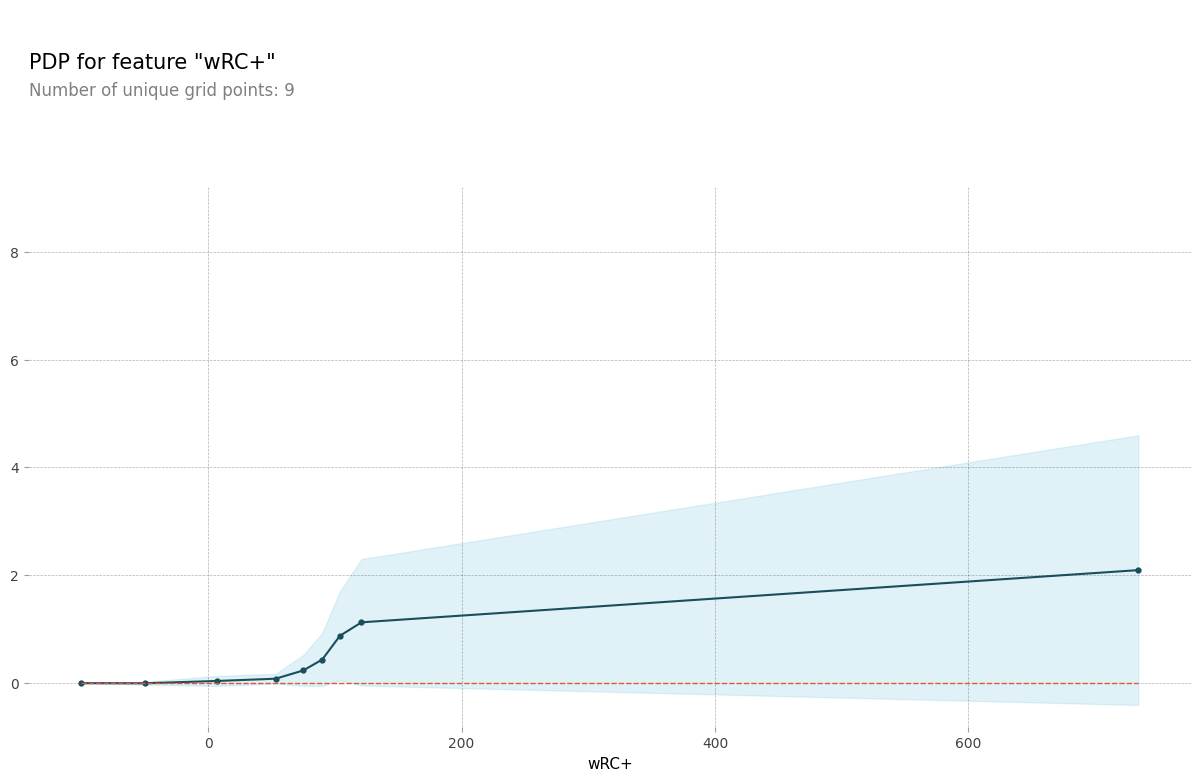

In [136]:
pdp_plot(isolated, feature_name=feature)

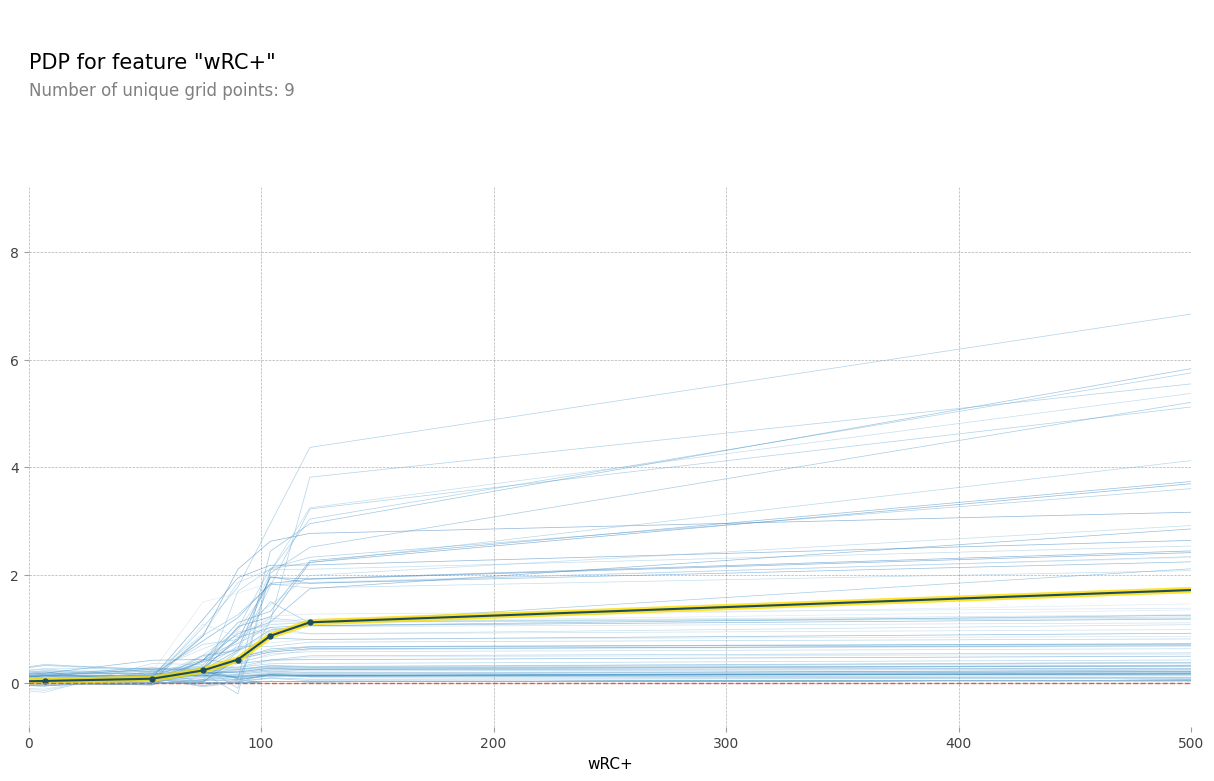

In [138]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=0.1)

plt.xlim(0,500);

In [0]:
# Partial Dependence Plots w/ 2 features

from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['wRC+', 'OPS']

interaction = pdp_interact(
    model=model,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

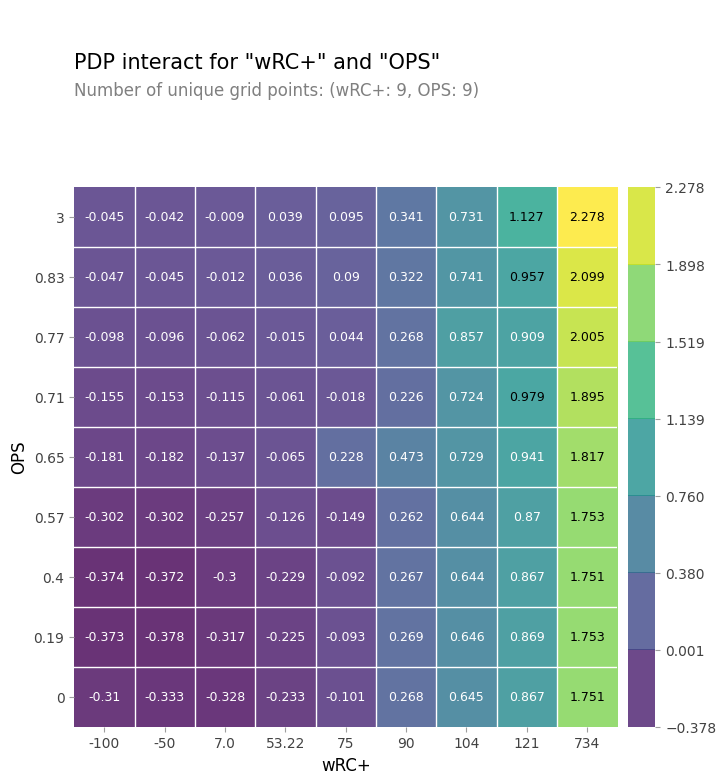

In [145]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [0]:
# Shapely
import shap

In [150]:
# Instantiate individual prediction
row = X_test.iloc[[0]]

# Instantiate TreeExplainer
explainer = shap.TreeExplainer(model)

# Pull shap values for individual observation
shap_values = explainer.shap_values(row)

# Visualize importance
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

In [151]:
# Predicting across X_test
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=X_train
)